# Polynomial Regression

In [72]:
import pandas as pd 
import numpy as np 


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [74]:
X= 6*np.random.rand(200,1) -3
y =0.8 *(X**2) + 0.9*X + 2 + np.random.randn(200,1)

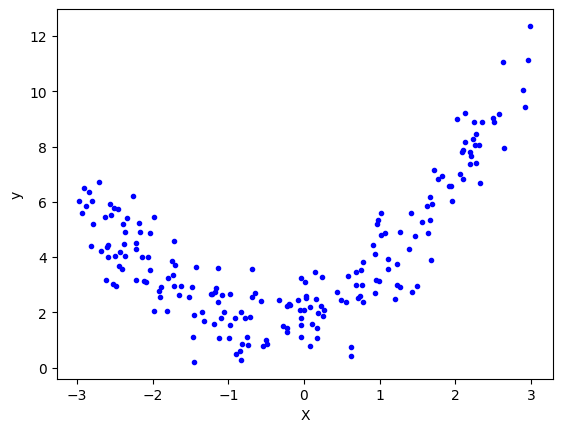

In [75]:
#  Y = 0.8(X)**2 + 0.9X +2

import matplotlib.pyplot as plt

#plt.scatter(X,y)
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [76]:
X_train ,X_test,Y_train ,Y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [77]:
lr =LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [78]:
y_predict=lr.predict(X_test)
r2_score(Y_test,y_predict)

0.2142670878527233

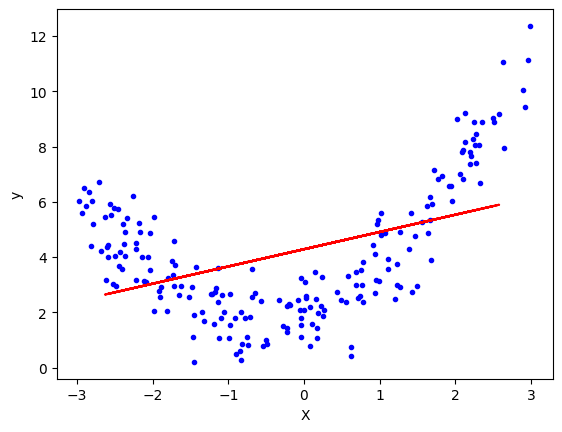

In [79]:
plt.plot(X,y,'b.')
plt.plot(X_test,y_predict,color ='r')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [80]:
# applying Polynomial Linear Regression
# degree2
# polynomial features can applied only to X_train and X_TEST 
poly =PolynomialFeatures(degree=2,include_bias=True)
X_train_poly =poly.fit_transform(X_train)
X_test_poly =poly.transform(X_test)


In [81]:
print(X_train[0])
print(X_train_poly[0])

[-0.04182002]
[ 1.         -0.04182002  0.00174891]


In [82]:
lr =LinearRegression()
lr.fit(X_train_poly,Y_train)

LinearRegression()

In [83]:
y_predict_p=lr.predict(X_test_poly)
r2_score(Y_test,y_predict_p)

0.8261267667109541

In [84]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.86436104 0.77313464]]
[2.05108816]


In [85]:
X_new =np.linspace(-3,3,200).reshape(200,1)
X_new_poly =poly.transform(X_new)
y_new =lr.predict(X_new_poly)

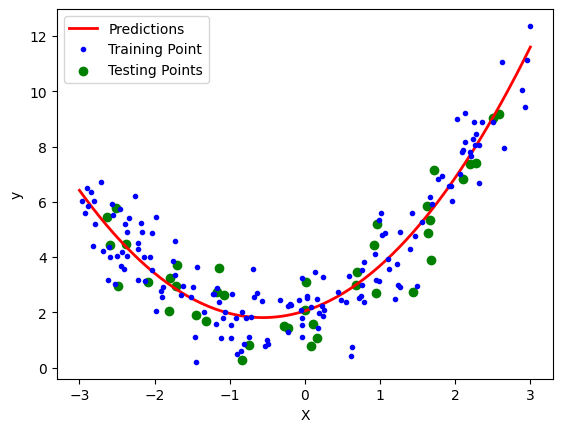

In [86]:
plt.plot(X_new,y_new,'r-',linewidth =2 ,label ='Predictions')
plt.plot(X_train,Y_train,'b.',label ="Training Point")
plt.scatter(X_test,Y_test,color ="g",label ="Testing Points")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# Multiple Linear Polynomial Regression












In [87]:
x = 7*np.random.rand(100,1) -2.8
y = 7*np.random.rand(100,1) -2.8
z =x**2 + y**2 +0.2*x +0.2*y +0.1*x*y +2+np.random.randn(100,1)

In [88]:
import plotly.express as px

df =px.data.iris()
fig =px.scatter_3d(df,x=x.ravel(),y =y.ravel(),z =z.ravel())
fig.show()

In [89]:
lr =LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input =np.linspace(x.min(),x.max(),10)
y_input =np.linspace(y.min(),y.max(),10)
xGrid ,yGrid =np.meshgrid(x_input,y_input)
final =np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T
z_final = lr.predict(final).reshape(10,10)

In [90]:
import plotly.graph_objects as go

fig =px.scatter_3d(df,x=x.ravel(),y =y.ravel(),z =z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.show()

In [91]:
X_multi =np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [96]:
from sklearn.preprocessing import PolynomialFeatures
poly3 =PolynomialFeatures(degree=3)
X_multi_trans =poly.fit_transform(X_multi)


In [95]:
# Access the attributes after fitting
print("Number of input features:", poly3.n_input_features_)
print("Number of output features:", poly3.n_output_features_)
print("Powers of features:\n", poly3.powers_)

AttributeError: 'PolynomialFeatures' object has no attribute 'n_input_features_'

In [98]:
X_multi.shape ,X_multi_trans.shape

((100, 2), (100, 6))

In [99]:
lr.fit(X_multi_trans,z)

LinearRegression()

In [102]:
#X_test_multi =poly3.transform(final)

In [103]:
z_final =lr.predict(X_multi_trans).reshape(10,10)

In [104]:
fig =px.scatter_3d(df,x=x.ravel(),y =y.ravel(),z =z.ravel())
fig.add_trace(go.Surface(x=x_input,y=y_input,z=z_final))
fig.update_layout(scene =dict(zaxis =dict(range=[0,35])))
fig.show()